In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv("Amazon Sale Report.csv", encoding="ISO-8859-1")
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


Cleaning Data 

In [4]:
df.isnull().sum()
print(df) 
print('*'*10)
# Removing dublicates rows 
df_cleaned = df.dropna()
print("\nDataset after Removing Null Values:")
print(df_cleaned.isnull().sum())
duplicates = df_cleaned.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicates}")
df_cleaned = df_cleaned.drop_duplicates()
print(f"\nDataset Shape after Removing Duplicates: {df_cleaned.shape}")

         index             Order ID      Date                        Status  \
0            0  405-8078784-5731545  04-30-22                     Cancelled   
1            1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2            2  404-0687676-7273146  04-30-22                       Shipped   
3            3  403-9615377-8133951  04-30-22                     Cancelled   
4            4  407-1069790-7240320  04-30-22                       Shipped   
...        ...                  ...       ...                           ...   
128971  128970  406-6001380-7673107  05-31-22                       Shipped   
128972  128971  402-9551604-7544318  05-31-22                       Shipped   
128973  128972  407-9547469-3152358  05-31-22                       Shipped   
128974  128973  402-6184140-0545956  05-31-22                       Shipped   
128975  128974  408-7436540-8728312  05-31-22                       Shipped   

       Fulfilment Sales Channel ship-service-level 

In [5]:
# Final Cleaned Dataset 
print("\nFinal Cleaned Dataset:")
print(df_cleaned.info())


Final Cleaned Dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               0 non-null      int64  
 1   Order ID            0 non-null      object 
 2   Date                0 non-null      object 
 3   Status              0 non-null      object 
 4   Fulfilment          0 non-null      object 
 5   Sales Channel       0 non-null      object 
 6   ship-service-level  0 non-null      object 
 7   Category            0 non-null      object 
 8   Size                0 non-null      object 
 9   Courier Status      0 non-null      object 
 10  Qty                 0 non-null      int64  
 11  currency            0 non-null      object 
 12  Amount              0 non-null      float64
 13  ship-city           0 non-null      object 
 14  ship-state          0 non-null      object 
 15  ship-postal-code    0 non-null      float64
 16  s

Underperforming Products: Are there any product categories that consistently underperform in terms of sales or revenue?

In [6]:
# Ensure 'Amount' column is numeric and 'Product Category' column exists
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
df = df.dropna(subset=['Amount'])  
print(df)

         index             Order ID      Date                        Status  \
0            0  405-8078784-5731545  04-30-22                     Cancelled   
1            1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2            2  404-0687676-7273146  04-30-22                       Shipped   
3            3  403-9615377-8133951  04-30-22                     Cancelled   
4            4  407-1069790-7240320  04-30-22                       Shipped   
...        ...                  ...       ...                           ...   
128971  128970  406-6001380-7673107  05-31-22                       Shipped   
128972  128971  402-9551604-7544318  05-31-22                       Shipped   
128973  128972  407-9547469-3152358  05-31-22                       Shipped   
128974  128973  402-6184140-0545956  05-31-22                       Shipped   
128975  128974  408-7436540-8728312  05-31-22                       Shipped   

       Fulfilment Sales Channel ship-service-level 

In [7]:
# Total Sales by Product Category 
category_sales = df.groupby('Category')['Amount'].sum().sort_values(ascending=True)
print(category_sales)

Category
Watch            915.00
Shoes         124752.76
Socks         150757.50
Wallet        458408.18
Perfume       789419.66
Trousers     5346286.30
Blazzer     11215104.12
Shirt       21297770.08
T-shirt     39206756.65
Name: Amount, dtype: float64


In [8]:
# Identifying Underperformaing Category 
threshold = category_sales.mean() * 0.5  # Define underperformance as below 50% of average sales
underperforming_categories = category_sales[category_sales < threshold]
print("\nUnderperforming Product Categories (Below 50% of Average Sales):")
print(underperforming_categories)



Underperforming Product Categories (Below 50% of Average Sales):
Category
Watch         915.00
Shoes      124752.76
Socks      150757.50
Wallet     458408.18
Perfume    789419.66
Name: Amount, dtype: float64


In [ ]:
# Total Sales of specific product in underperformimg Category  
underperforming_products = df[df['Category'].isin(underperforming_categories.index)]
product_sales_underperforming = underperforming_products.groupby('Category')['Amount'].sum().sort_values(ascending=True)
underperforming_stats = {
    "Total Sales (Underperforming)": underperforming_categories.sum(),
    "Average Sales (Underperforming)": underperforming_categories.mean(),
    "Max Sales (Underperforming)": underperforming_categories.max(),
    "Min Sales (Underperforming)": underperforming_categories.min(),
    "Std Dev Sales (Underperforming)": underperforming_categories.std(),
}
print("\nStatistics for Underperforming Categories:")
for key, value in underperforming_stats.items():
    print(f"{key}: {value:.2f}")



Statistics for Underperforming Categories:
Total Sales (Underperforming): 1524253.10
Average Sales (Underperforming): 304850.62
Max Sales (Underperforming): 789419.66
Min Sales (Underperforming): 915.00
Std Dev Sales (Underperforming): 318960.76


In [ ]:
# Percentiles for Underperforming Categories 
category_sales_array = underperforming_categories.values
percentiles = {
    "25th Percentile": np.percentile(category_sales_array, 25),
    "50th Percentile (Median)": np.percentile(category_sales_array, 50),
    "75th Percentile": np.percentile(category_sales_array, 75),
    "Variance": np.var(category_sales_array),
    "Coefficient of Variation": np.std(category_sales_array) / np.mean(category_sales_array),
}
print("\nAnalysis for Underperforming Categories:")
for key, value in percentiles.items():
    print(f"{key}: {value:.2f}")


Analysis for Underperforming Categories:
25th Percentile: 124752.76
50th Percentile (Median): 150757.50
75th Percentile: 458408.18
Variance: 81388773734.47
Coefficient of Variation: 0.94


 Visualization

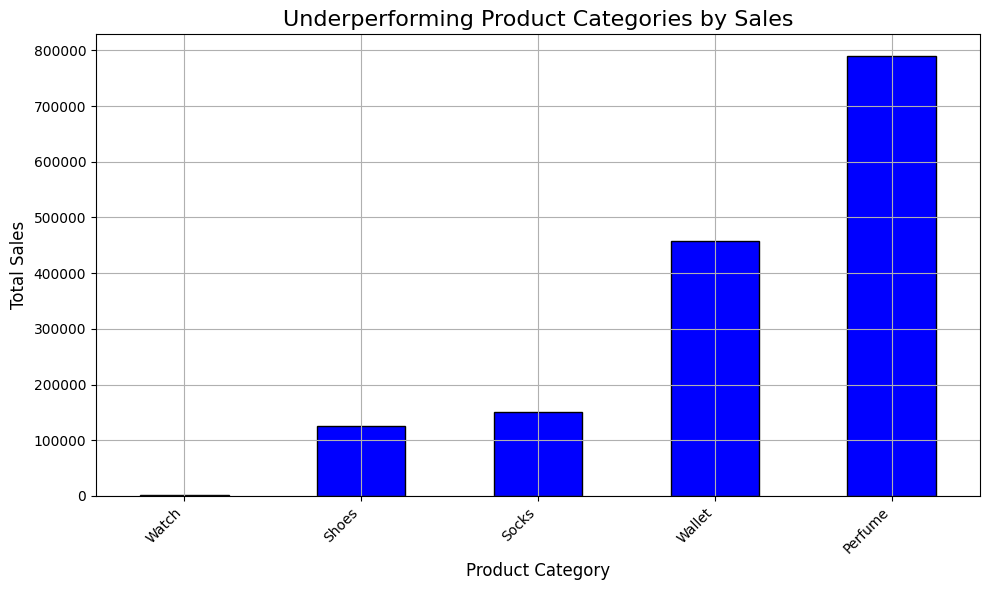

In [11]:
# Bar Graph: Underperforming Product Categories by Sales 
plt.figure(figsize=(10, 6))
underperforming_categories.plot(kind='bar', color='blue', edgecolor='black')
plt.title("Underperforming Product Categories by Sales", fontsize=16)
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

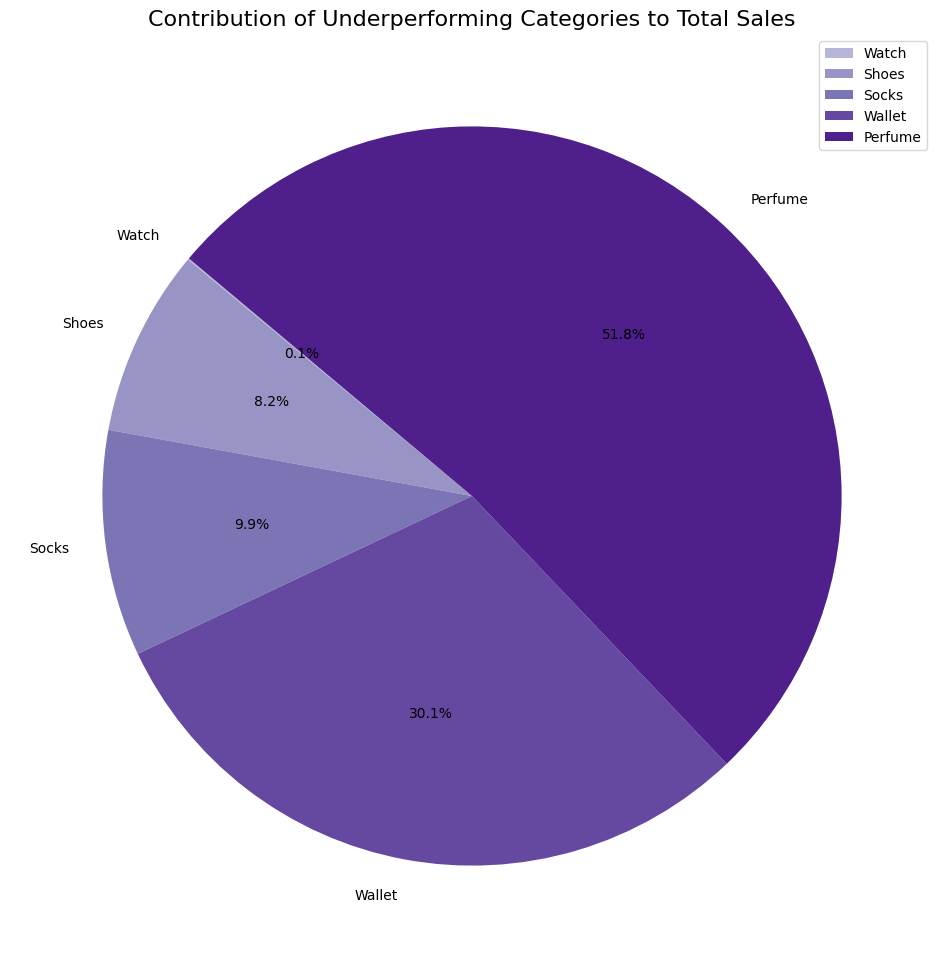

In [18]:
# Pie Chart: Underperforming Categories' Contribution to Total Sales
plt.figure(figsize=(14, 12))
plt.pie(
    underperforming_categories, 
    labels=underperforming_categories.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.Purples(np.linspace(0.4, 0.9, len(underperforming_categories)))
)
plt.title("Contribution of Underperforming Categories to Total Sales", fontsize=16)
plt.legend()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_1176\523254116.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


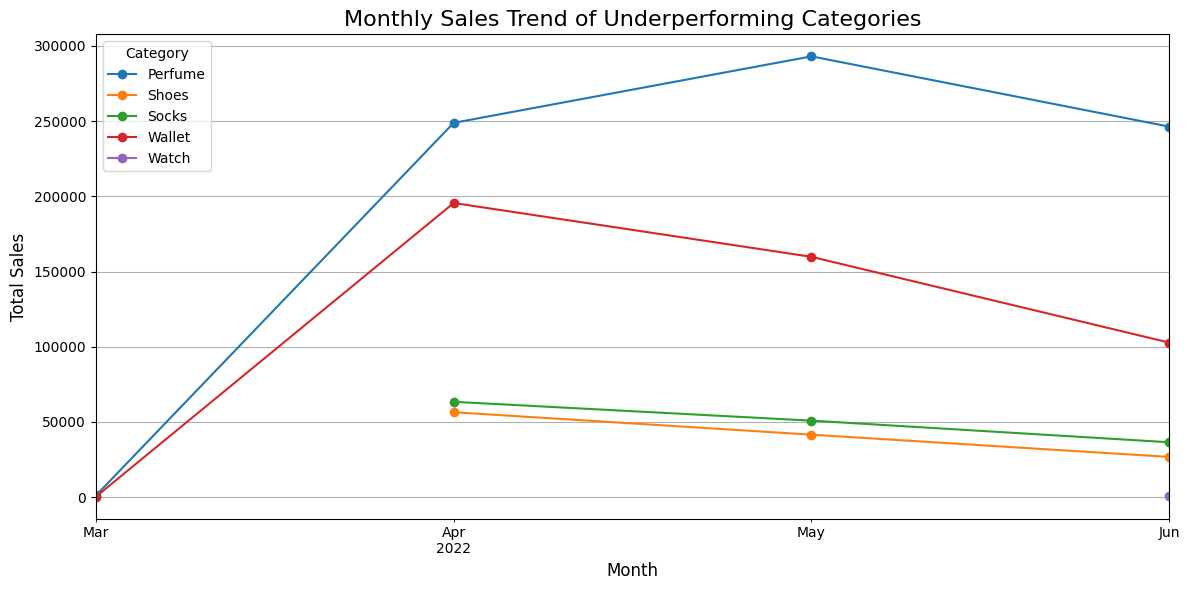

In [14]:
# Line Graph: Monthly Sales Trend of Underperforming Categories 
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])

underperforming_data = df[df['Category'].isin(underperforming_categories.index)]
monthly_sales_underperforming = underperforming_data.groupby([underperforming_data['Date'].dt.to_period('M'), 'Category'])['Amount'].sum().unstack()

monthly_sales_underperforming.plot(kind='line', figsize=(12, 6), marker='o')
plt.title("Monthly Sales Trend of Underperforming Categories", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.grid(True)
plt.legend(title='Category')
plt.tight_layout()
plt.show()

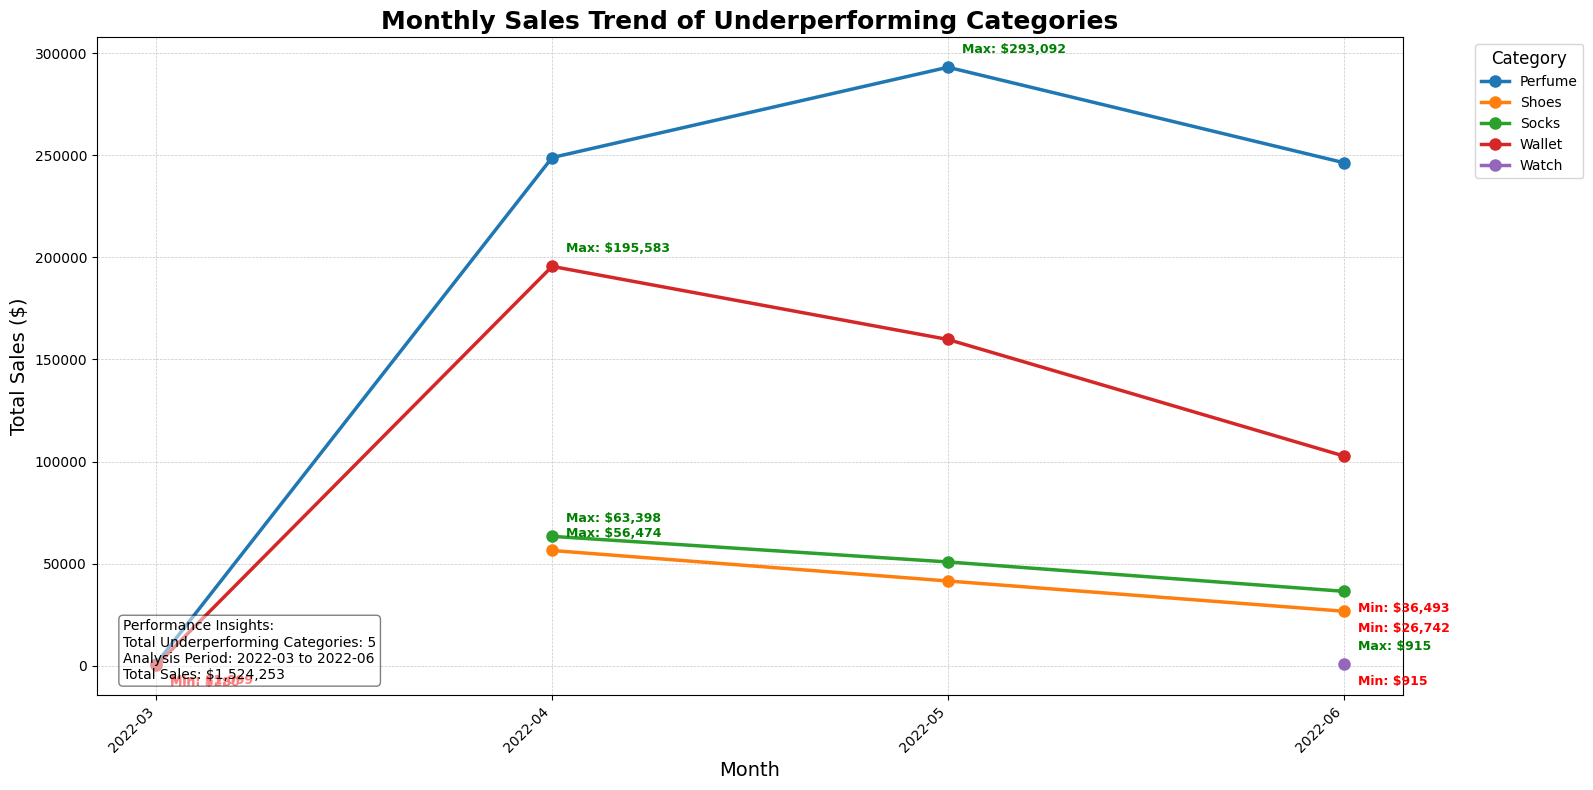

In [15]:
# Line Graph: Monthly Sales Trend of Underperforming Categories
plt.style.use('default')  
plt.figure(figsize=(16, 8), dpi=100)
for category in monthly_sales_underperforming.columns:
    plt.plot(monthly_sales_underperforming.index.astype(str), 
             monthly_sales_underperforming[category], 
             marker='o',  
             linewidth=2.5,  
             markersize=8,  
             label=category)
plt.title("Monthly Sales Trend of Underperforming Categories", 
          fontsize=18, 
          fontweight='bold')
plt.xlabel("Month", fontsize=14)
plt.ylabel("Total Sales ($)", fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Category', 
           title_fontsize=12, 
           bbox_to_anchor=(1.05, 1), 
           loc='upper left')
for category in monthly_sales_underperforming.columns:
    max_index = monthly_sales_underperforming[category].idxmax()
    min_index = monthly_sales_underperforming[category].idxmin()
    
    max_value = monthly_sales_underperforming.loc[max_index, category]
    min_value = monthly_sales_underperforming.loc[min_index, category]
    
    # Annotate max point
    plt.annotate(f'Max: ${max_value:,.0f}', 
                 (monthly_sales_underperforming.index.get_loc(max_index), max_value),
                 xytext=(10, 10),
                 textcoords='offset points',
                 fontsize=9,
                 color='green',
                 fontweight='bold')
    plt.annotate(f'Min: ${min_value:,.0f}', 
                 (monthly_sales_underperforming.index.get_loc(min_index), min_value),
                 xytext=(10, -15),
                 textcoords='offset points',
                 fontsize=9,
                 color='red',
                 fontweight='bold')

# Add performance insights
plt.text(0.02, 0.02, 
         f"Performance Insights:\n"
         f"Total Underperforming Categories: {len(monthly_sales_underperforming.columns)}\n"
         f"Analysis Period: {monthly_sales_underperforming.index[0]} to {monthly_sales_underperforming.index[-1]}\n"
         f"Total Sales: ${monthly_sales_underperforming.sum().sum():,.0f}",
         transform=plt.gca().transAxes, 
         fontsize=10, 
         verticalalignment='bottom', 
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

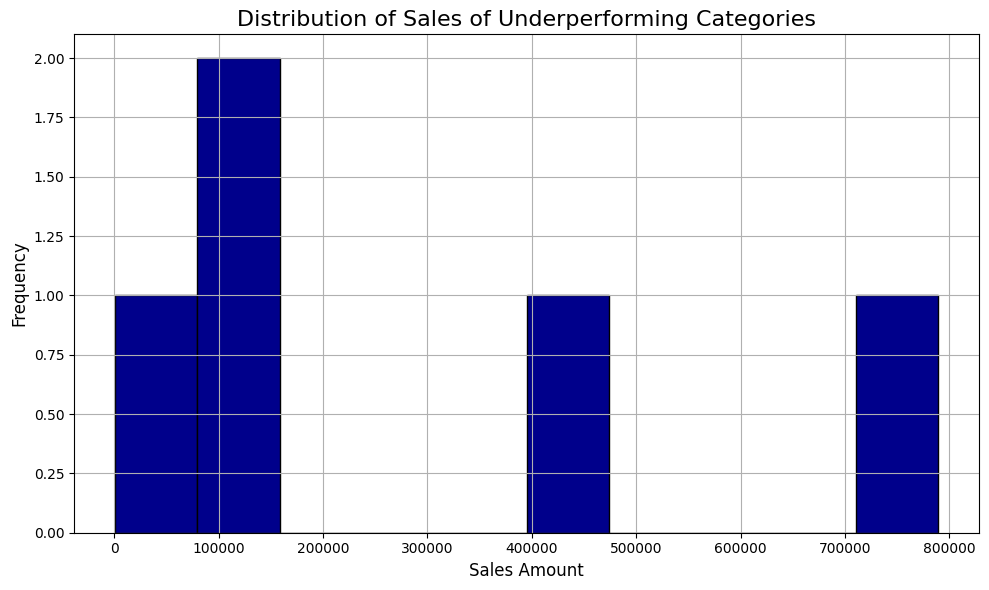

In [ ]:
# Histogram  Distribution of Underperforming Categories' Sales
plt.figure(figsize=(10, 6))
plt.hist(underperforming_categories, bins=10, color='darkblue', edgecolor='black')
plt.title("Distribution of Sales of Underperforming Categories", fontsize=16)
plt.xlabel("Sales Amount", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
print("\nDetailed Category Performance Analysis:")
for category in monthly_sales_underperforming.columns:
    print(f"\n{category} Category:")
    print(f"Average Monthly Sales Rs: {monthly_sales_underperforming[category].mean():,.2f}")
    print(f"Total Sales Rs: {monthly_sales_underperforming[category].sum():,.2f}")
    print(f"Highest Month Rs: {monthly_sales_underperforming[category].idxmax()} ({monthly_sales_underperforming[category].max():,.2f})")
    print(f"Lowest Month Rs: {monthly_sales_underperforming[category].idxmin()} ({monthly_sales_underperforming[category].min():,.2f})")


Detailed Category Performance Analysis:

Perfume Category:
Average Monthly Sales Rs: 197,354.92
Total Sales Rs: 789,419.66
Highest Month Rs: 2022-05 (293,092.34)
Lowest Month Rs: 2022-03 (1,099.00)

Shoes Category:
Average Monthly Sales Rs: 41,584.25
Total Sales Rs: 124,752.76
Highest Month Rs: 2022-04 (56,474.24)
Lowest Month Rs: 2022-06 (26,741.90)

Socks Category:
Average Monthly Sales Rs: 50,252.50
Total Sales Rs: 150,757.50
Highest Month Rs: 2022-04 (63,397.97)
Lowest Month Rs: 2022-06 (36,492.96)

Wallet Category:
Average Monthly Sales Rs: 114,602.04
Total Sales Rs: 458,408.18
Highest Month Rs: 2022-04 (195,583.21)
Lowest Month Rs: 2022-03 (280.00)

Watch Category:
Average Monthly Sales Rs: 915.00
Total Sales Rs: 915.00
Highest Month Rs: 2022-06 (915.00)
Lowest Month Rs: 2022-06 (915.00)


Code Explanation:
Data Cleaning:

Ensure the Amount and Product Category columns are valid and numeric.
Underperforming Categories:

Categories with sales below 50% of the average total sales are flagged as underperforming.
Statistics:

Compute key statistics (Total, Average, Max, Min, Std Dev) for underperforming categories.
Use NumPy to calculate percentiles, variance, and Coefficient of Variation.
Visualization:

Bar Graph: Sales volume of underperforming categories.
Pie Chart: Contribution of underperforming categories to total sales.
Line Graph: Monthly sales trends for underperforming categories.
Histogram: Distribution of sales values for underperforming categories.
Expected Outputs:
Bar Graph: Clearly shows the sales volume of each underperforming category.
Pie Chart: Displays the contribution of underperforming categories to overall sales.
Line Graph: Tracks monthly sales trends of underperforming categories.
Histogram: Shows how sales values are distributed among underperforming categories.
Insights:
This analysis highlights products/categories that consistently perform poorly, helping in decisions like:

Reducing or discontinuing low-performing categories.
Strategically promoting or rebranding these categories.